<a id='sect0'></a>
## <font color='darkblue'>Preface</font>
([article source](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)) <font size='3ptx'>**Stacking or Stacked Generalization is an ensemble machine learning algorithm.**</font>

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

**The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.**

In this tutorial, you will discover the stacked generalization ensemble or stacking in Python.

After completing this tutorial, you will know:
* Stacking is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models.
* The scikit-learn library provides a standard implementation of the stacking ensemble in Python.
* How to use stacking ensembles for regression and classification predictive modeling.

### <font color='darkgreen'>Tutorial Overview</font>
This tutorial is divided into four parts; they are:
* <font size='3ptx'>[**Stacked Generalization**](#sect1)</font>
* <font size='3ptx'>[**Stacking Scikit-Learn API**](#sect2)</font>
* <font size='3ptx'>[**Stacking for Classification**](#sect3)</font>
* <font size='3ptx'>[**Stacking for Regression**](#sect4)</font>

In [30]:
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor

<a id='sect1'></a>
## <font color='darkblue'>Stacked Generalization</font> ([back](#sect0))
<font size='3ptx'>**Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm.**</font>

It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

Stacking addresses the question:
> Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

**The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.**

* Unlike bagging, in stacking, the models are typically different (<font color='brown'>e.g. not all decision trees</font>) and fit on the same dataset (<font color='brown'>e.g. instead of samples of the training dataset</font>).
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (<font color='brown'>e.g. instead of a sequence of models that correct the predictions of prior models</font>).

The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.
* **Level-0 Models (Base-Models)**: Models fit on the training data and whose predictions are compiled.
* **Level-1 Model (Meta-Model)**: Model that learns how to best combine the predictions of the base models.

**The meta-model is trained on the predictions made by base models on out-of-sample data**. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

The most common approach to preparing the training dataset for the meta-model is via [k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/) of the base models, where the [out-of-fold predictions](https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/) are used as the basis for the training dataset for the meta-model.

The training data for the meta-model may also include the inputs to the base models, e.g. input elements of the training data. This can provide an additional context to the meta-model as to how to best combine the predictions from the meta-model.

Once the training dataset is prepared for the meta-model, the meta-model can be trained in isolation on this dataset, and the base-models can be trained on the entire original training dataset.

**Stacking is appropriate when multiple different machine learning models have skill on a dataset, but have skill in different ways.** Another way to say this is that the predictions made by the models or the errors in predictions made by the models are uncorrelated or have a low correlation.

**Base-models are often complex and diverse. As such, it is often a good idea to use a range of models that make very different assumptions about how to solve the predictive modeling task**, such as linear models, decision trees, support vector machines, neural networks, and more. Other ensemble algorithms may also be used as base-models, such as random forests.

The meta-model is often simple, providing a smooth interpretation of the predictions made by the base models. As such, linear models are often used as the meta-model, such as linear regression for regression tasks (<font color='brown'>predicting a numeric value</font>) and logistic regression for classification tasks (<font color='brown'>predicting a class label</font>). Although this is common, it is not required.

**The use of a simple linear model as the meta-model often gives stacking the colloquial name “blending.” As in the prediction is a weighted average or blending of the predictions made by the base models.**

The [**super learner**](https://machinelearningmastery.com/super-learner-ensemble-in-python/) may be considered a specialized type of stacking.

<font color='darkred'>**Stacking is designed to improve modeling performance, although is not guaranteed to result in an improvement in all cases.**</font>

**Achieving an improvement in performance depends on the complexity of the problem and whether it is sufficiently well represented by the training data and complex enough that there is more to learn by combining predictions**. It is also dependent upon the choice of base models and whether they are sufficiently skillful and sufficiently uncorrelated in their predictions (<font color='brown'>or errors</font>).

If a base-model performs as well as or better than the stacking ensemble, the base model should be used instead, given its lower complexity (<font color='brown'>e.g. it’s simpler to describe, train and maintain</font>).

<a id='sect2'></a>
## <font color='darkblue'>Stacking Scikit-Learn API</font> ([back](#sect0))
<font size='3ptx'>**Stacking can be implemented from scratch, although this can be challenging for beginners.**</font>

For an example of implementing stacking from scratch in Python, see the tutorial:
* [How to Implement Stacked Generalization (Stacking) From Scratch With Python](https://machinelearningmastery.com/implementing-stacking-scratch-python/)

For an example of implementing stacking from scratch for deep learning, see the tutorial:
* [How to Develop a Stacking Ensemble for Deep Learning Neural Networks in Python](https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/)

The scikit-learn Python machine learning library provides an implementation of stacking for machine learning. It is available in version 0.22 of the library and higher. First, confirm that you are using a modern version of the library by running the following script:

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


Stacking is provided via the [**StackingRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) and [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) classes.

Both models operate the same way and take the same arguments. Using the model requires that you specify a list of estimators (<font color='brown'>level-0 models</font>), and a final estimator (<font color='brown'>level-1 or meta-model</font>).

A list of level-0 models or base models is provided via the “<font color='violet'>estimators</font>” argument. This is a Python list where each element in the list is a tuple with the name of the model and the configured model instance.

For example, below defines two level-0 models:
```python
models = [('lr',LogisticRegression()),('svm',SVC()), ...]
stacking = StackingClassifier(estimators=models)
```

Each model in the list may also be a [**Pipeline**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), including any data preparation required by the model prior to fitting the model on the training dataset. For example:
```python
models = [('lr',LogisticRegression()),('svm',make_pipeline(StandardScaler(),SVC())), ...]
stacking = StackingClassifier(estimators=models)
```

The level-1 model or meta-model is provided via the “<font color='violet'>final_estimator</font>” argument. By default, this is set to [**LinearRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for regression and [**LogisticRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for classification, and these are sensible defaults that you probably do not want to change.

The dataset for the meta-model is prepared using cross-validation. By default, 5-fold cross-validation is used, although this can be changed via the “<font color='violet'>cv</font>” argument and set to either a number (<font color='brown'>e.g. 10 for 10-fold cross-validation</font>) or a cross-validation object (<font color='brown'>e.g. [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)</font>).

Sometimes, better performance can be achieved if the dataset prepared for the meta-model also includes inputs to the level-0 models, e.g. the input training data. This can be achieved by setting the “<font color='violet'>passthrough</font>” argument to True and is not enabled by default.

Now that we are familiar with the stacking API in scikit-learn, let’s look at some worked examples.

<a id='sect3'></a>
## <font color='darkblue'>Stacking for Classification</font> ([back](#sect0))
<font size='3ptx'>**In this section, we will look at using stacking for a classification problem.**</font>

First, we can use the [make_classification() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a synthetic binary classification problem with 1,000 examples and 20 input features. The complete example is listed below.

In [8]:
# test classification dataset

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# define dataset
X, y = get_dataset()
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate a suite of different machine learning models on the dataset. Specifically, we will evaluate the following five algorithms:
* Logistic Regression.
* k-Nearest Neighbors.
* Decision Tree.
* Support Vector Machine.
* Naive Bayes.

Each algorithm will be evaluated using default model hyperparameters. The function <font color='blue'>get_models()</font> below creates the models we wish to evaluate.

In [6]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    
    return models

Each model will be evaluated using repeated k-fold cross-validation.

The <font color='blue'>evaluate_model()</font> function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

In [7]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

We can then report the mean performance of each algorithm and also create a box and whisker plot to compare the distribution of accuracy scores for each algorithm. Tying this together, the complete example is listed below.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.043)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


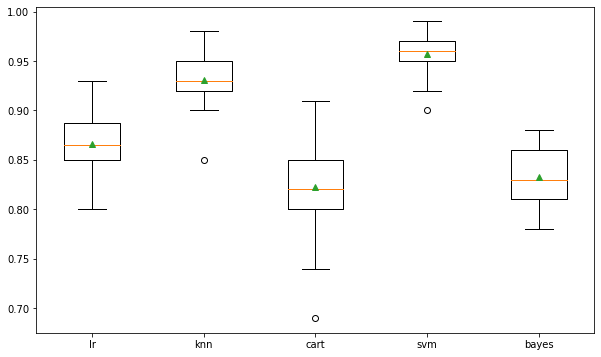

In [10]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.rcParams['figure.figsize'] = [10, 6]
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that KNN and SVM perform better on average than LR, CART, and Bayes.

Here we have five different algorithms that perform well, presumably in different ways on this dataset. **Next, we can try to combine these five models into a single ensemble model using stacking.**

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

The <font color='blue'>get_stacking()</font> function below defines the [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [12]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

    # define meta learner model
    level1 = LogisticRegression()

    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

We can include the stacking ensemble in the list of models to evaluate, along with the standalone models.

In [13]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case and if it is not the case, then the base model should be used in favor of the ensemble model.

The complete example of evaluating the stacking ensemble model alongside the standalone models is listed below.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.832 (0.041)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.019)


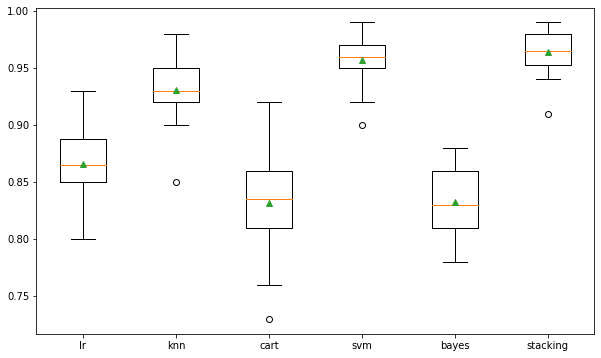

In [16]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In this case, we can see that the stacking ensemble appears to perform better than any single model on average, achieving an accuracy of about 96.4 percent.

If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the stacking ensemble is fit on all available data, then the predict() function can be called to make predictions on new data. The example below demonstrates this on our binary classification dataset.

In [17]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X, y)

# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


<a id='sect4'></a>
## <font color='darkblue'>Stacking for Regression</font> ([back](#sect0))
<font size='3ptx'>**In this section, we will look at using stacking for a regression problem.**</font>

First, we can use the [make_regression() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to create a synthetic regression problem with 1,000 examples and 20 input features.

In [20]:
# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

X, y = get_dataset()
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate a suite of different machine learning models on the dataset. Specifically, we will evaluate the following three algorithms:
* k-Nearest Neighbors.
* Decision Tree.
* Support Vector Regression.

Each algorithm will be evaluated using the default model hyperparameters. The function <font color='blue'>get_models()</font> below creates the models we wish to evaluate.

In [21]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

Each model will be evaluated using repeated k-fold cross-validation. The <font color='blue'>evaluate_model()</font> function below takes a model instance and returns a list of scores from three repeats of 10-fold cross-validation.

In [23]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

We can then report the mean performance of each algorithm and also create a box and whisker plot to compare the distribution of accuracy scores for each algorithm.

In this case, model performance will be reported using the mean absolute error (MAE). The scikit-learn library inverts the sign on this error to make it maximizing, from -infinity to 0 for the best score.

Tying this together, the complete example is listed below.

>knn -101.019 (7.161)
>cart -147.678 (11.114)
>svm -162.419 (12.565)


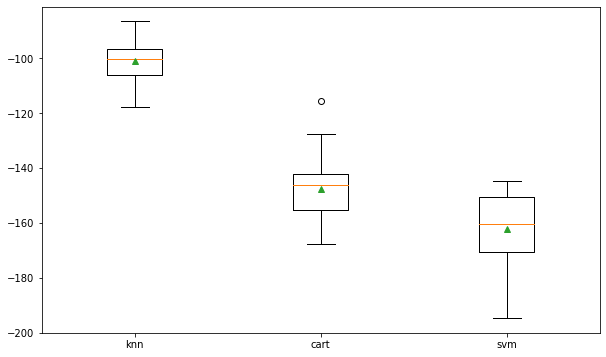

In [26]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Here we have three different algorithms that perform well, presumably in different ways on this dataset. Next, we can try to combine these three models into a single ensemble model using stacking.

We can use a linear regression model to learn how to best combine the predictions from each of the separate three models.

The <font color='blue'>get_stacking()</font> function below defines the [**StackingRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) model by first defining a list of tuples for the three base models, then defining the linear regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [27]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))

    # define meta learner model
    level1 = LinearRegression()

    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

We can include the stacking ensemble in the list of models to evaluate, along with the standalone models.

In [28]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case, and if it is not the case, then the base model should be used in favor of the ensemble model.

The complete example of evaluating the stacking ensemble model alongside the standalone models is listed below.

>knn -101.019 (7.161)
>cart -148.418 (11.313)
>svm -162.419 (12.565)
>stacking -56.430 (5.248)


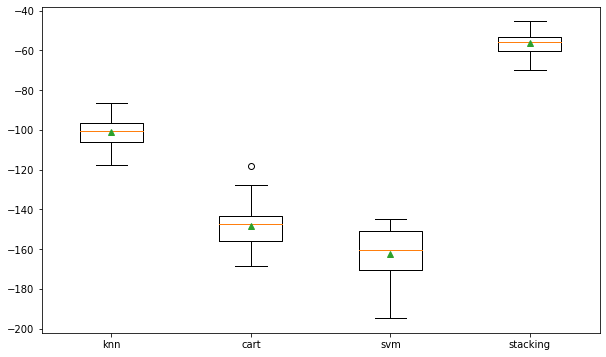

In [31]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In this case, we can see that the stacking ensemble appears to perform better than any single model on average, achieving a mean negative MAE of about -56. A box plot is created showing the distribution of model error scores. Here, we can see that the mean and median scores for the stacking model sit much higher than any individual model.

If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the stacking ensemble is fit on all available data, then the <font color='blue'>predict()</font> function can be called to make predictions on new data.

The example below demonstrates this on our regression dataset.

In [32]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 557.065
